### Задание

Возьмите любую обученную сеть. С помощью CMake создайте приложение на языке C++, которое будет ее использовать. Ответом на данное ДЗ может быть не только colab ноутбук, но и гугл-ворд-документ в котором есть скриншоты работы программы.

In [ ]:
# Ваше решение

In [ ]:
# загрузка библиотек

# методы для отрисовки изображений
from PIL import Image 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для генерации случайных чисел 
import random 

# Библиотека работы с массивами
import numpy as np 

# Для работы с файлами 
import os 

# импортируем модуль для загрузки данных
import gdown 

# для разделения выборок
from sklearn.model_selection import train_test_split

# для создания сети
from tensorflow.keras.models import Sequential

# для создания слоев
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# для работы с изображениями
from tensorflow.keras.preprocessing import image

# оптимизатор
from tensorflow.keras.optimizers import Adam 

# модуль для отсчета времени
import time 

In [ ]:
# загрузка датасета, укажем путь к базе в Google Drive, база в виде .zip-архива 
gdown.download('https://storage.googleapis.com/terra_ai/DataSets/bus.zip', None, quiet=True) 

# Распакуем архив в директорию 'content/bus'
!unzip -q "bus.zip" -d /content/bus  

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/bus/' 

# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH) 

['getting_off', 'entering']

In [ ]:
# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['entering', 'getting_off']


In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

entering : ['04169.jpg', '02107.jpg', '04511.jpg', '00083.jpg', '05576.jpg', '00602.jpg', '05518.jpg', '04295.jpg', '04353.jpg', '04334.jpg', '05617.jpg', '02210.jpg', '01966.jpg', '04083.jpg', '06210.jpg', '00812.jpg', '05746.jpg', '02219.jpg', '00695.jpg', '05806.jpg', '03754.jpg', '06429.jpg', '02044.jpg', '04665.jpg', '05118.jpg', '04962.jpg', '05311.jpg', '05848.jpg', '05502.jpg', '02155.jpg', '01912.jpg', '01449.jpg', '05310.jpg', '02200.jpg', '05127.jpg', '04544.jpg', '00385.jpg', '06221.jpg', '01134.jpg', '01645.jpg', '03354.jpg', '00557.jpg', '02043.jpg', '03649.jpg', '03294.jpg', '00807.jpg', '01954.jpg', '02119.jpg', '03241.jpg', '02127.jpg', '03390.jpg', '00718.jpg', '01622.jpg', '00578.jpg', '05263.jpg', '05085.jpg', '05189.jpg', '01097.jpg', '02830.jpg', '01467.jpg', '01683.jpg', '02129.jpg', '02688.jpg', '04899.jpg', '05928.jpg', '01411.jpg', '03449.jpg', '00029.jpg', '05588.jpg', '03618.jpg', '02491.jpg', '01160.jpg', '03722.jpg', '06271.jpg', '01565.jpg', '01266.jpg', 

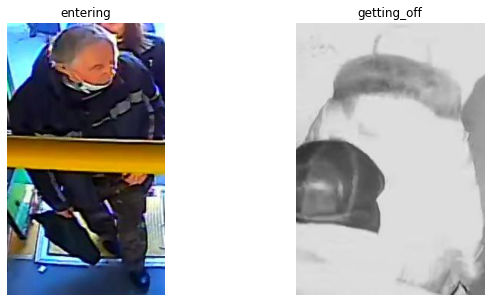

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path)) 
    
    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса entering составляет 6485 фото
Размер класса getting_off составляет 2596 фото

Общий размер базы для обучения: 9081


In [ ]:
img_shape = []
for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name)#.resize((IMG_WIDTH, IMG_HEIGHT)) 
    img_np = np.array(img)                # Перевод в numpy-массив
    img_shape.append(img_np.shape)
img_shape=np.array(img_shape)
img_mean=img_shape.mean(axis=0)
img_std=img_shape.std(axis=0)

img_mean_x=img_mean[1]
img_mean_y=img_mean[0]
print("Mean=",img_mean,"STD=",img_std,"Mean/Std=",img_std/img_mean)

Mean= [342.14436736 207.40942627   3.        ] STD= [139.04571477  82.60373159   0.        ] Mean/Std= [0.40639487 0.39826411 0.        ]


In [ ]:



IMG_WIDTH=int(img_mean_x/2)-int(img_mean_x/2)%2
IMG_HEIGHT=int(img_mean_y/2)-int(img_mean_y/2)%2
x_train = []
x_test = []
x_val = []
y_train = []
y_test = []
y_val = []
print(IMG_WIDTH,IMG_HEIGHT)

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT)) 
    img_np = np.array(img)                # Перевод в numpy-массив
    x_train.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку
x_train=np.array(x_train)
y_train=np.array(data_labels)
#scale
x_train=x_train/255


x_train, x_test, y_train, y_test = train_test_split(x_train, # ----------------- датасет с изображениям
                                                    y_train, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # --- 
x_train, x_val, y_train, y_val = train_test_split(x_train, # ----------------- датасет с изображениям
                                                    y_train, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # --- 
print(x_train.shape,x_test.shape,x_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)



102 170
(7354, 170, 102, 3) (909, 170, 102, 3) (818, 170, 102, 3)
(7354,) (909,) (818,)


In [ ]:
y_train[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

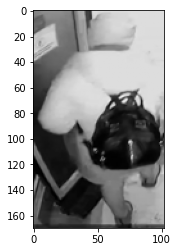

In [ ]:
plt.imshow(x_train[4])  
    
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 170, 102, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 170, 102, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 170, 102, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 170, 102, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 51, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 85, 51, 32)        0

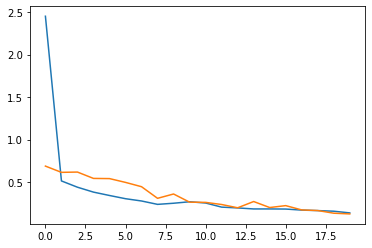

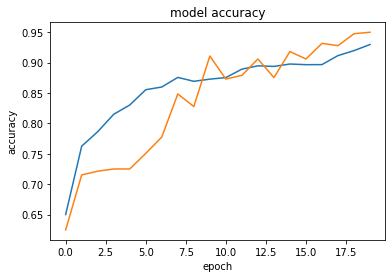

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=np.shape(x_train[0])))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),shuffle=True,batch_size=128,epochs=20,verbose=2)
print(model.evaluate(x_test,y_test))
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Epoch 1/10
58/58 - 21s - loss: 0.1310 - accuracy: 0.9342 - val_loss: 0.1304 - val_accuracy: 0.9425 - 21s/epoch - 367ms/step
Epoch 2/10
58/58 - 21s - loss: 0.1278 - accuracy: 0.9374 - val_loss: 0.2300 - val_accuracy: 0.9181 - 21s/epoch - 360ms/step
Epoch 3/10
58/58 - 21s - loss: 0.1376 - accuracy: 0.9365 - val_loss: 0.2785 - val_accuracy: 0.9132 - 21s/epoch - 359ms/step
Epoch 4/10
58/58 - 21s - loss: 0.1391 - accuracy: 0.9330 - val_loss: 0.3639 - val_accuracy: 0.8533 - 21s/epoch - 359ms/step
Epoch 5/10
58/58 - 21s - loss: 0.1400 - accuracy: 0.9300 - val_loss: 0.1175 - val_accuracy: 0.9548 - 21s/epoch - 359ms/step
Epoch 6/10
58/58 - 21s - loss: 0.1132 - accuracy: 0.9462 - val_loss: 0.2159 - val_accuracy: 0.9364 - 21s/epoch - 360ms/step
Epoch 7/10
58/58 - 21s - loss: 0.1074 - accuracy: 0.9512 - val_loss: 0.2083 - val_accuracy: 0.9364 - 21s/epoch - 359ms/step
Epoch 8/10
58/58 - 21s - loss: 0.0993 - accuracy: 0.9542 - val_loss: 0.4910 - val_accuracy: 0.8912 - 21s/epoch - 359ms/step
Epoch 9/

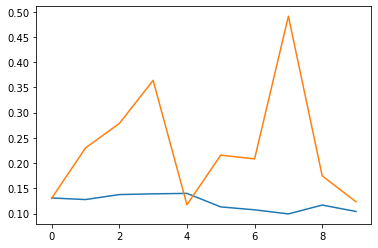

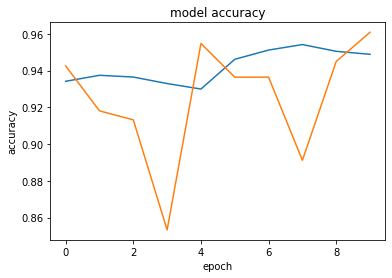

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),shuffle=True,batch_size=128,epochs=10,verbose=2)
print(model.evaluate(x_test,y_test))
plt.plot(history.history['loss'], label='loss train')
plt.plot(history.history['val_loss'], label='loss test')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
model.save('/content/drive/MyDrive/NN/passenger.h5')

Оттренировал и сохранил модель

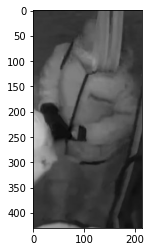

In [ ]:
plt.imshow(Image.open("/content/bus/entering/01799.jpg"))  
# Отрисовка всего полотна
plt.show()

In [ ]:
!ls bus/entering

00000.jpg  00927.jpg  01854.jpg  02781.jpg  03708.jpg  04635.jpg  05562.jpg
00001.jpg  00928.jpg  01855.jpg  02782.jpg  03709.jpg  04636.jpg  05563.jpg
00002.jpg  00929.jpg  01856.jpg  02783.jpg  03710.jpg  04637.jpg  05564.jpg
00003.jpg  00930.jpg  01857.jpg  02784.jpg  03711.jpg  04638.jpg  05565.jpg
00004.jpg  00931.jpg  01858.jpg  02785.jpg  03712.jpg  04639.jpg  05566.jpg
00005.jpg  00932.jpg  01859.jpg  02786.jpg  03713.jpg  04640.jpg  05567.jpg
00006.jpg  00933.jpg  01860.jpg  02787.jpg  03714.jpg  04641.jpg  05568.jpg
00007.jpg  00934.jpg  01861.jpg  02788.jpg  03715.jpg  04642.jpg  05569.jpg
00008.jpg  00935.jpg  01862.jpg  02789.jpg  03716.jpg  04643.jpg  05570.jpg
00009.jpg  00936.jpg  01863.jpg  02790.jpg  03717.jpg  04644.jpg  05571.jpg
00010.jpg  00937.jpg  01864.jpg  02791.jpg  03718.jpg  04645.jpg  05572.jpg
00011.jpg  00938.jpg  01865.jpg  02792.jpg  03719.jpg  04646.jpg  05573.jpg
00012.jpg  00939.jpg  01866.jpg  02793.jpg  03720.jpg  04647.jpg  05574.jpg
00013.jpg  0

Скрипт загрузки и распознавания

In [ ]:
cnt = '''

from tensorflow.keras.models import load_model
import numpy as np
from io import BytesIO
from PIL import Image 

INPUT_SHAPE = (96, 54, 3)
model = load_model("passenger.h5")#/content/drive/MyDrive/NN/
image = Image.open("01799.jpg")#/content/bus/entering/
resized_image = image.resize((102,170)) 
array = np.array(resized_image)[np.newaxis, ...] 
prediction_array = model.predict(array)[0] 
class_names = ['Entering', 'GettingOut']
print(class_names[0 if prediction_array[0]<0.5 else 1])
'''

# Сохранение кода в файл
with open('script.py', 'w') as file:
    file.write(cnt)

Тест скрипта

In [ ]:
!python script.py

2022-03-22 09:59:52.017637: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Entering


In [ ]:
from google.colab import files
files.download("script.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cnt = '''
cmake_minimum_required(VERSION 3.8)
project (test-app)
add_executable(test-app test.cpp)
'''

# Сохранение кода в файл
with open('CMakeLists.txt', 'w') as file:
    file.write(cnt)
from google.colab import files
files.download("CMakeLists.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

С++ вызов скрипта

In [ ]:
cnt = '''
// hello.cpp

#include <iostream>
#include <fstream>
#include "string"

using namespace std;

int main(int argc, char* argv[])
{
    	string filename = "script.py";
      string command = "python ";
      string line="";
      command += filename;
      system(command.c_str());
      // Вывод кода на экран
        std::ifstream in("script.py");

        if (in.is_open())
        {		
            while (getline(in, line))
            {
                cout << line << endl;
        }
        cin >> line;
        }
      else{
        cout<< "File not found" << endl;
        cin >> line;
      }
        in.close();    
      return 0;
}
'''

# Сохранение кода в файл
with open('test.cpp', 'w') as file:
    file.write(cnt)
from google.colab import files
files.download("test.cpp")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title Подключение библиотек
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [ ]:
#@title Запуск терминала
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Colab Shell',
      name: 'colab_demo',
      height: 450,
      prompt: 'colab > '
  });

Дальше скрины. 
Скопировал файлы, выполнил CMAKE, выполнил файл. На втором скрине написано Entering

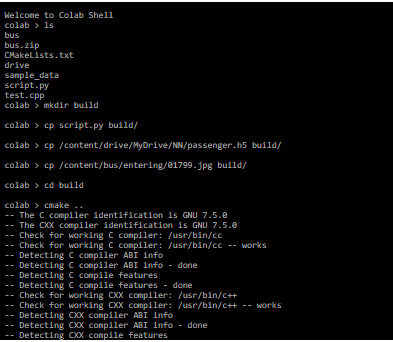

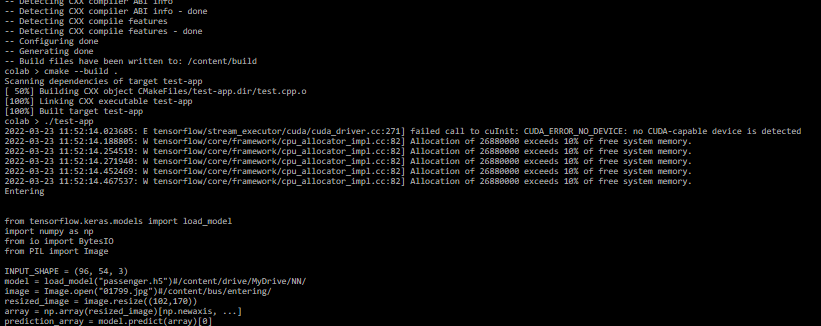

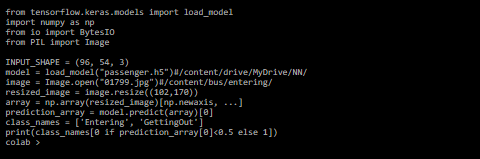